In [1]:
library("tidyverse")
library("ggrepel")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df_marathon = read.csv('https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv')

df_filtered = df_marathon %>% 
    filter(country %in% c('United States', 'Kenya', 'Ethiopia', 'Japan'))

df_country = df_marathon %>%
    filter(country %in% c('United States', 'Kenya', 'Ethiopia', 'Japan')) %>%
    group_by(country, MF) %>%
    summarize(race.time = mean(race.time), year = mean(year))

`summarise()` regrouping output by 'country' (override with `.groups` argument)



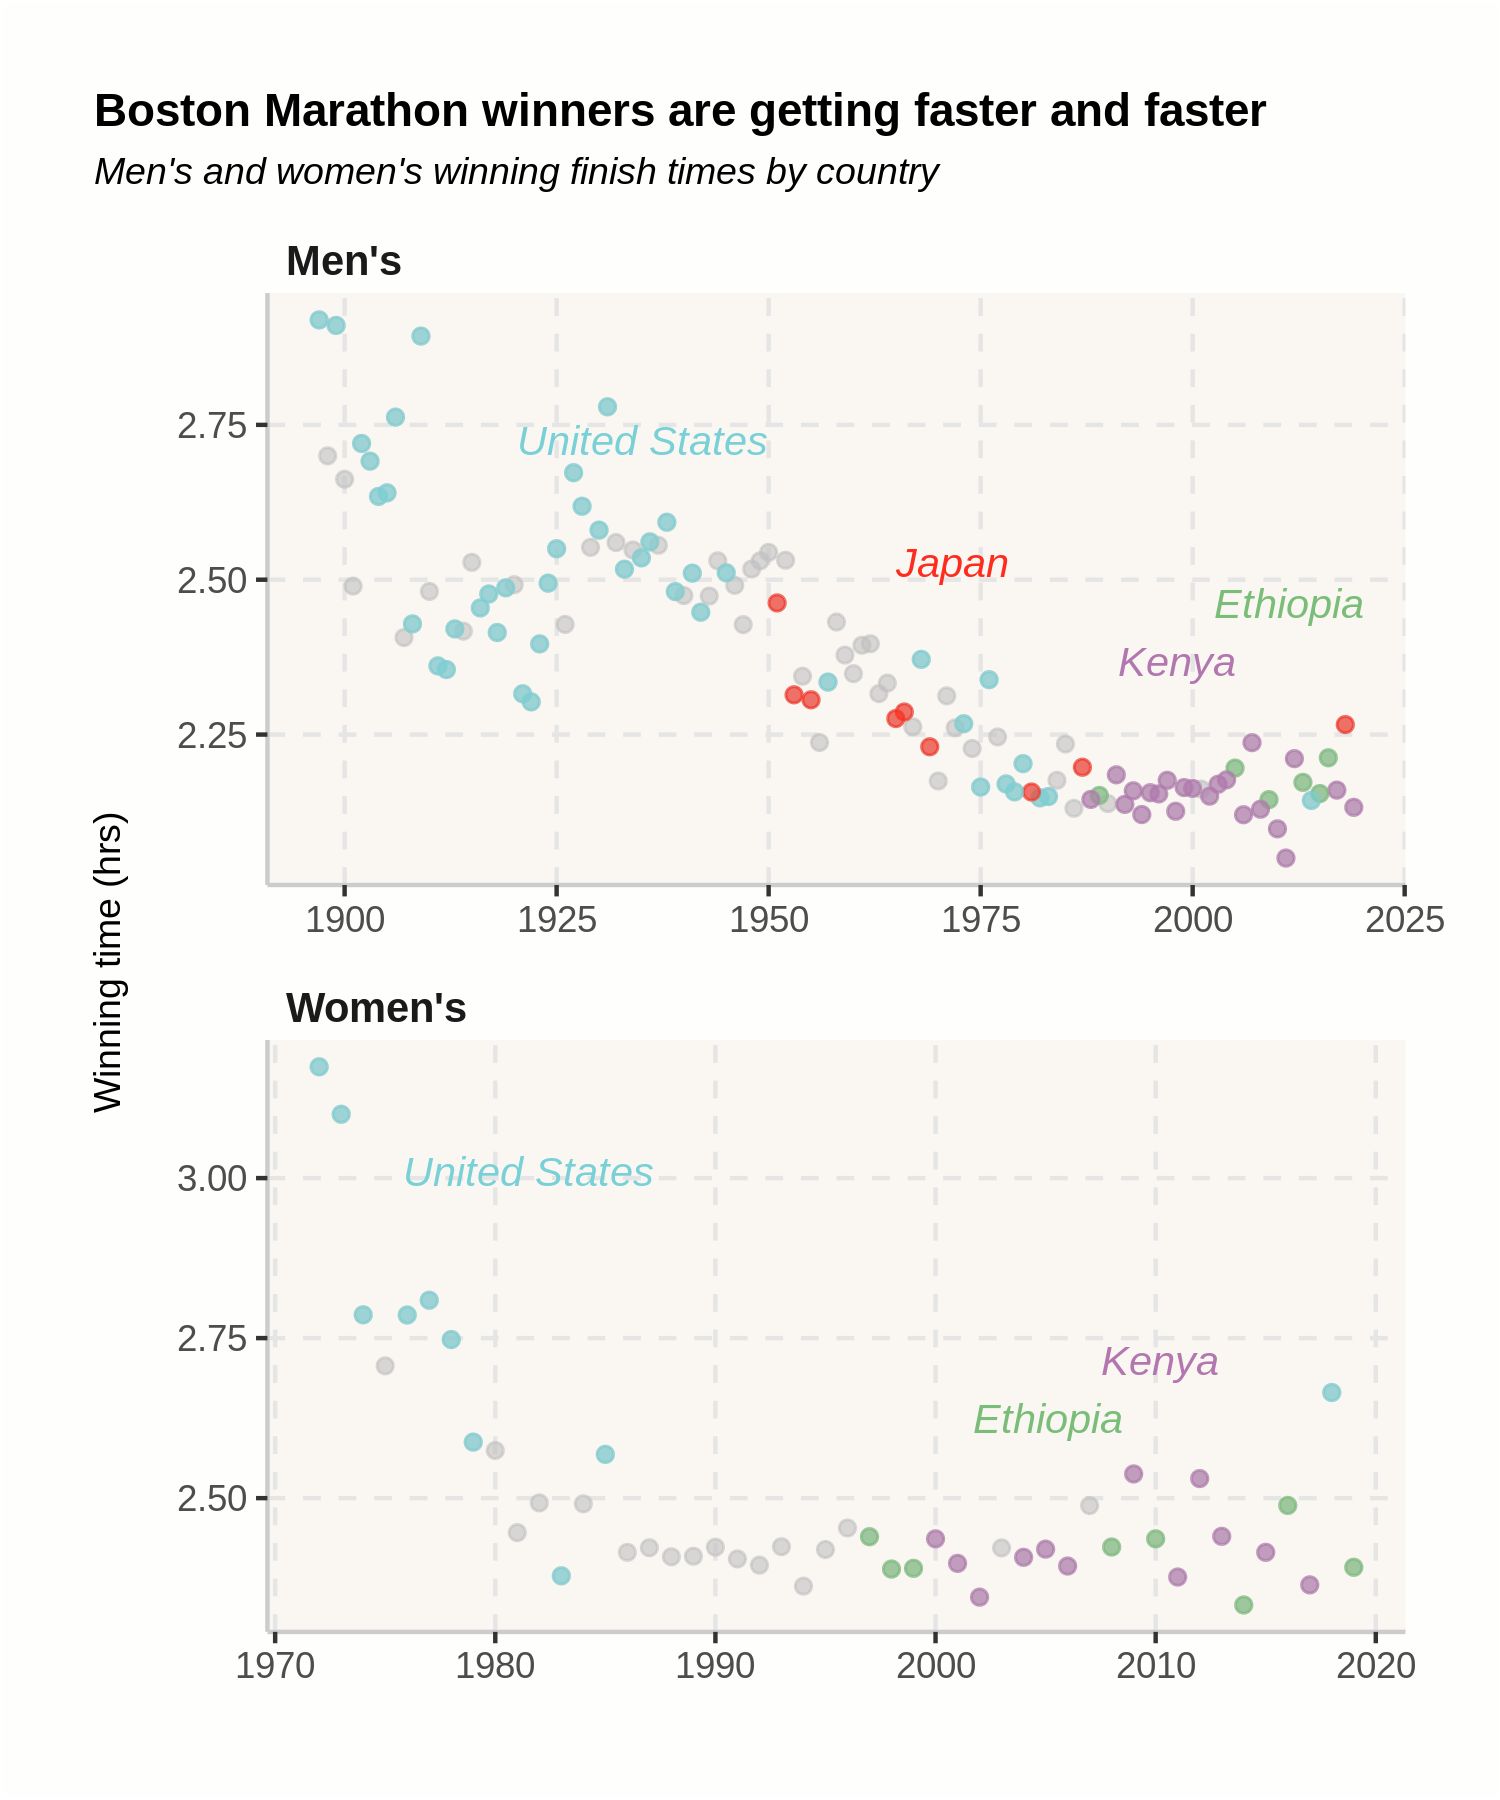

In [3]:
options(repr.plot.width = 5, repr.plot.height = 6, repr.plot.res = 300)

p = ggplot(df_marathon, aes(x = year, y = race.time)) +
    geom_point(color = "gray75", alpha = .6) +
    geom_point(data = df_filtered, aes(color = country), alpha = .6) +
    geom_text_repel(
        segment.color = "transparent",
        nudge_y = 0.25,
        data = df_country, 
        aes(label = country, color = country, fontface = "italic"),
        size = 3.5,
    ) +
    scale_color_manual(values = c("#79bd79", "#fc2d1f", "#b177ae", "#79d0d6")) +
    facet_wrap(~MF, scales = "free", ncol = 1) +
    labs(
        title = "Boston Marathon winners are getting faster and faster",
        subtitle = "Men's and women's winning finish times by country",
        x = element_blank(),
        y = "Winning time (hrs)"
    ) +
    theme(
        plot.margin = unit(c(.8,.8,.8,.8),"cm"),
        plot.title = element_text(size = 11, face = "bold"),
        plot.title.position = "plot",
        plot.subtitle = element_text(size = 9, face = "italic"),
        plot.background = element_rect(fill = "#fefefd"),
        panel.background = element_rect(fill = "#faf7f2"),
        panel.grid.major = element_line(linetype = "dashed", color = "gray90"),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        strip.text = element_text(hjust = 0, vjust = 0, size = 10, face = "bold"),
        axis.title.y = element_text(size = 9, margin = unit(c(0,.4,0,0),"cm")),
        axis.line = element_line(linetype = "solid", color = "gray80"),
        legend.position = "none"
    )

p